# Base model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.cifar10.load_data()

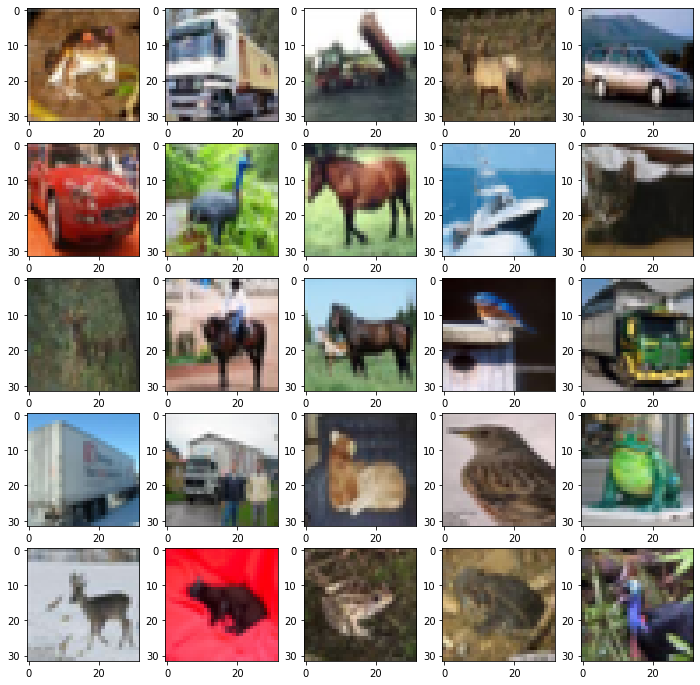

In [3]:
plt.figure(figsize = (12, 12))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i])

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [7]:
import os, random

def reset_seed(seed = 0):
  os.environ['PYTHONHASHSEED'] = '0'
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [8]:
from tensorflow.keras import models, layers

In [9]:
reset_seed(0)

model = models.Sequential([
                           layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                           layers.Dense(128, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [10]:
batch_size = 1024
epochs = 100

history = model.fit(x_train, t_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, t_test))

Epoch 1/100
49/49 [==============================] - 7s 67ms/step - loss: 2.1066 - accuracy: 0.2194 - val_loss: 1.6740 - val_accuracy: 0.3960
Epoch 2/100
49/49 [==============================] - 2s 41ms/step - loss: 1.6037 - accuracy: 0.4301 - val_loss: 1.4258 - val_accuracy: 0.4915
Epoch 3/100
49/49 [==============================] - 2s 40ms/step - loss: 1.4055 - accuracy: 0.4989 - val_loss: 1.3449 - val_accuracy: 0.5216
Epoch 4/100
49/49 [==============================] - 2s 40ms/step - loss: 1.3181 - accuracy: 0.5354 - val_loss: 1.2553 - val_accuracy: 0.5523
Epoch 5/100
49/49 [==============================] - 2s 40ms/step - loss: 1.2175 - accuracy: 0.5693 - val_loss: 1.1776 - val_accuracy: 0.5853
Epoch 6/100
49/49 [==============================] - 2s 40ms/step - loss: 1.1492 - accuracy: 0.5963 - val_loss: 1.1628 - val_accuracy: 0.5882
Epoch 7/100
49/49 [==============================] - 2s 41ms/step - loss: 1.0882 - accuracy: 0.6209 - val_loss: 1.1049 - val_accuracy: 0.6160
Epoch 

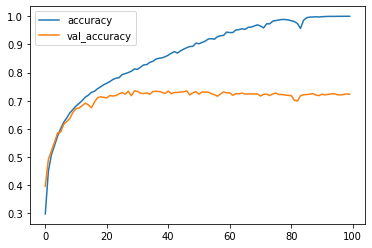

In [11]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

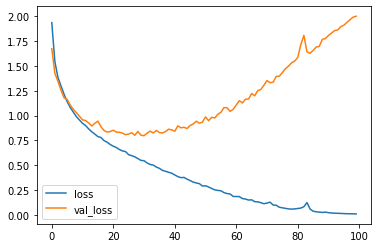

In [12]:
results[['loss', 'val_loss']].plot()

In [13]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
99,0.009038,0.9999,2.000798,0.7232


In [14]:
record = results[-1:]
record.index = ['Base model']
record

,loss,accuracy,val_loss,val_accuracy
Base model,0.009038,0.9999,2.000798,0.7232


# Data generation

In [15]:
img = x_train[4]

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
def show(img, datagen):
  img_batch = img.reshape(1, 32, 32, 3)

  for img_augmented in datagen.flow(img_batch, batch_size = 1):
    out = img_augmented.reshape(32, 32, 3)
    break
  
  plt.figure(figsize = (10, 10))
  plt.subplot(1, 2, 1)
  plt.title('before')
  plt.imshow(img)

  plt.subplot(1, 2, 2)
  plt.title('after')
  plt.imshow(out)

## Rotation 

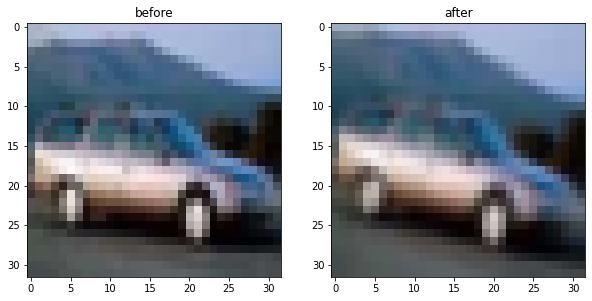

In [18]:
datagen = ImageDataGenerator(rotation_range = 60)

show(img, datagen)

## Horizontal movement

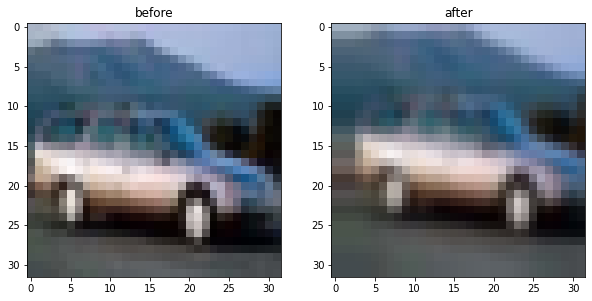

In [19]:
datagen = ImageDataGenerator(width_shift_range = 0.5,
                             height_shift_range = 0.5)

show(img, datagen)

## Shear

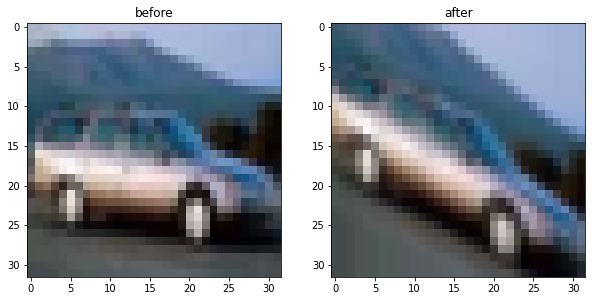

In [20]:
datagen = ImageDataGenerator(shear_range = 30)

show(img, datagen)

## Zoom

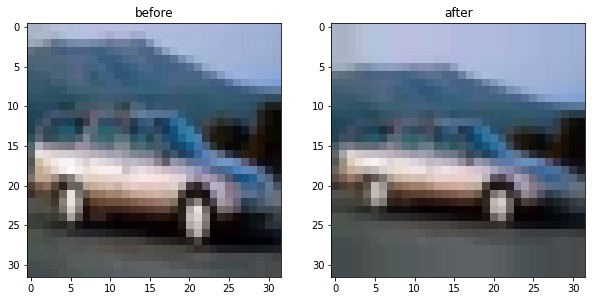

In [21]:
datagen = ImageDataGenerator(zoom_range = 0.5)

show(img, datagen)

## Horizontal flip

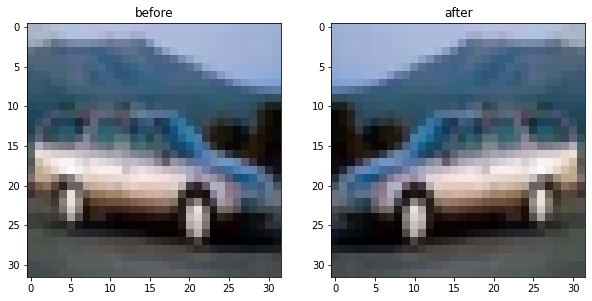

In [22]:
datagen = ImageDataGenerator(horizontal_flip = True)

show(img, datagen)

## Vertical flip

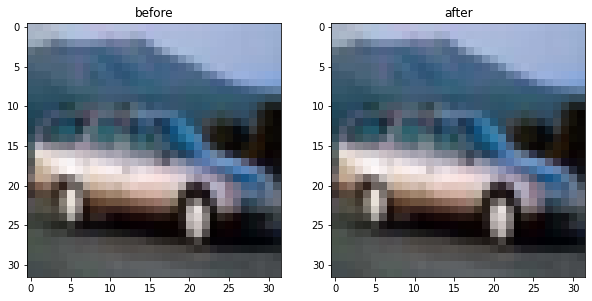

In [23]:
datagen = ImageDataGenerator(vertical_flip = True)

show(img, datagen)

## Option

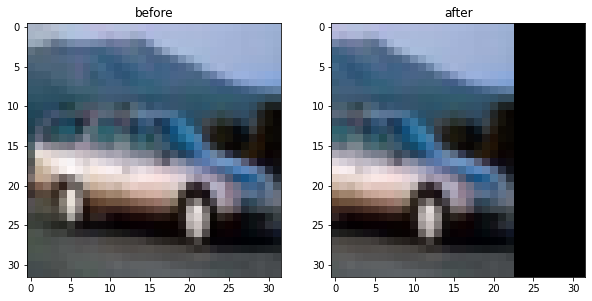

In [24]:
datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = 'constant')
show(img, datagen)

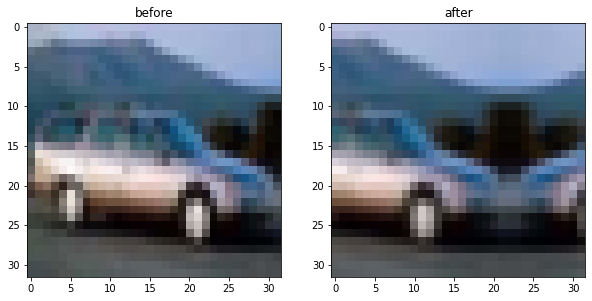

In [25]:
datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = 'reflect')
show(img, datagen)

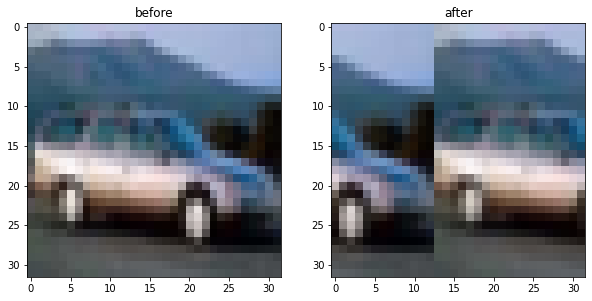

In [26]:
datagen = ImageDataGenerator(width_shift_range = 0.5, fill_mode = 'wrap')
show(img, datagen)

In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
img = x_train[4]

datagen = ImageDataGenerator(vertical_flip = True)
img_batch = img.reshape(1, 32, 32, 3)

max_img_num = 1
counts = 1
for img_augmented in datagen.flow(img_batch, batch_size = 1):
  img_augmented = img_augmented.reshape(32, 32, 3)
  image.save_img('augmented_output.png', img_augmented)
  if (counts % max_img_num) == 0:
    print('Finish!!')
    break
  counts += 1

Finish!!


# Augmented model

In [29]:
datagen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True
)

In [30]:
reset_seed(0)

model = models.Sequential([
                           layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                           layers.Dense(128, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(lr = 1e-3)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [31]:
batch_size = 1024
epochs = 100

history = model.fit_generator(datagen.flow(x_train, t_train, batch_size = batch_size),
                              steps_per_epoch = len(x_train) / batch_size,
                              epochs = epochs,
                              validation_data = (x_test, t_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
48/48 [==============================] - 3s 63ms/step - loss: 2.1807 - accuracy: 0.2215 - val_loss: 1.8356 - val_accuracy: 0.1009
Epoch 2/100
48/48 [==============================] - 3s 57ms/step - loss: 1.7608 - accuracy: 0.1066 - val_loss: 1.6316 - val_accuracy: 0.1369
Epoch 3/100
48/48 [==============================] - 3s 56ms/step - loss: 1.5862 - accuracy: 0.1007 - val_loss: 1.5360 - val_accuracy: 0.0619
Epoch 4/100
48/48 [==============================] - 3s 56ms/step - loss: 1.4898 - accuracy: 0.0911 - val_loss: 1.4222 - val_accuracy: 0.0708
Epoch 5/100
48/48 [==============================] - 3s 57ms/step - loss: 1.4193 - accuracy: 0.0931 - val_loss: 1.3604 - val_accuracy: 0.0833
Epoch 6/100
48/48 [==============================] - 3s 56ms/step - loss: 1.3553 - accuracy: 0.0944 - val_loss: 1.2976 - val_accuracy: 0.0975
Epoch 7/100
48/48 [==============================] - 3s 56ms/step - loss: 1.2992 - accuracy: 0.0982 - val_loss: 1.2588 - val_accuracy: 0.0550
Epoch 

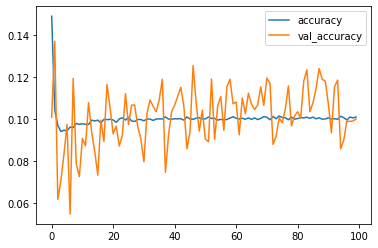

In [32]:
results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot()

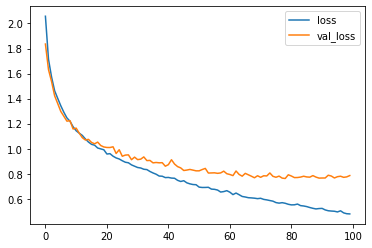

In [33]:
results[['loss', 'val_loss']].plot()

In [34]:
results.tail(1)

,loss,accuracy,val_loss,val_accuracy
99,0.479104,0.10098,0.785424,0.1


In [35]:
_ = results.tail(1)
_.index = ['Augemented model']
record = pd.concat([record, _])

In [36]:
record

,loss,accuracy,val_loss,val_accuracy
Base model,0.009038,0.99990,2.000798,0.7232
Augemented model,0.479104,0.10098,0.785424,0.1000
